# 학습 목표
* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.
* Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다.

# 01 Boston 주택 가격 예측 모델
* 데이터셋은 보스턴 시의 주택 가격 데이터셋
* 주택의 여러 요건과 가격 정보가 포함
* 회귀분석에 자주 사용되는 대표적인 데이터셋
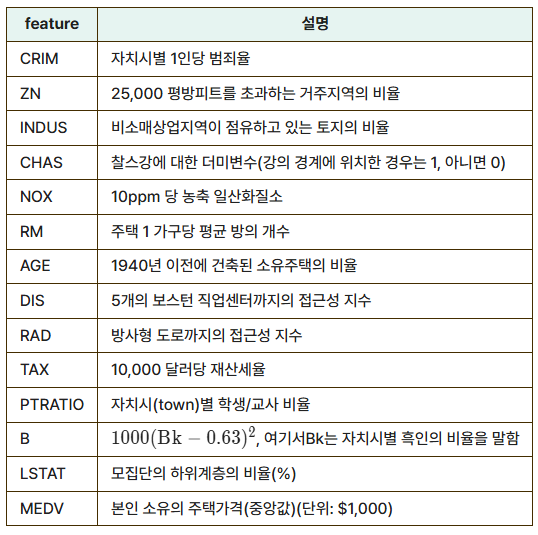

## 데이터 로드 및 전처리
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.    
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 
활용합니다.    
데이터 스케일링 (Data Scaling) - 전처리 진행

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
r_mean = train_data.mean(axis=0)  # 각 열(특성)의 평균
r_std = train_data.std(axis=0)    # 각 열(특성)의 표준편차

# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
r_meandata = train_data - r_mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = r_meandata / r_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
t_mean = test_data.mean(axis=0) 
t_std = test_data.std(axis=0) 
test_data = (test_data - t_mean) / t_std

print(train_data)
print('=' * 20)
print(test_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]
[[ 2.8040301  -0.50784934  0.96960877 ...  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 ... -0.28485844  0.3909446
   0.58604286]
 [-0.56808398 -0.50784934 -0.86176938 ...  0.90513041  0.41570668
  -0.38506427]
 ...
 [-0.23539182 -0.50784934  1.17955762 ... -1.82192738  0.32313459
  -1.55879807]
 [-0.5113909  -0.50784934 -0.71849348 ... -0.48318992  0.34967446
  -0.38956708]
 [-0.03148414 -0.50784934  1.17955762 ... -1.82192738 -1.57465677
  -0.3745577 ]]


## 모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.     
Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 회귀니까 출력은 1개, 활성화 함수 없음



# 모델 컴파일
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mae'])

model.summary()

#참고 : 64, 128, 256 같은 2의 제곱수는 컴퓨터 구조에 적합하고 성능이 좋다는 경험적 예시가 있다.

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 128 (512.00 B)

## 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
history = model.fit(train_data, train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2
                   )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 567.3929 - mae: 21.8767 - val_loss: 640.9331 - val_mae: 23.6137
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 544.7373 - mae: 21.5613 - val_loss: 629.7529 - val_mae: 23.4047
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 506.3163 - mae: 20.8421 - val_loss: 617.6141 - val_mae: 23.1729
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 483.4395 - mae: 20.2026 - val_loss: 603.1957 - val_mae: 22.8924
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 462.8831 - mae: 19.7986 - val_loss: 587.1051 - val_mae: 22.5721
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 418.1248 - mae: 18.8543 - val_loss: 569.1911 - val_mae: 22.2029
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 380.4867 - mae: 17.9877 - val_loss: 548.8868 - val_mae: 21.7735
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 358.4637 - mae: 17.3745 - val_loss: 526.3848 - val_mae: 21.2836
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━

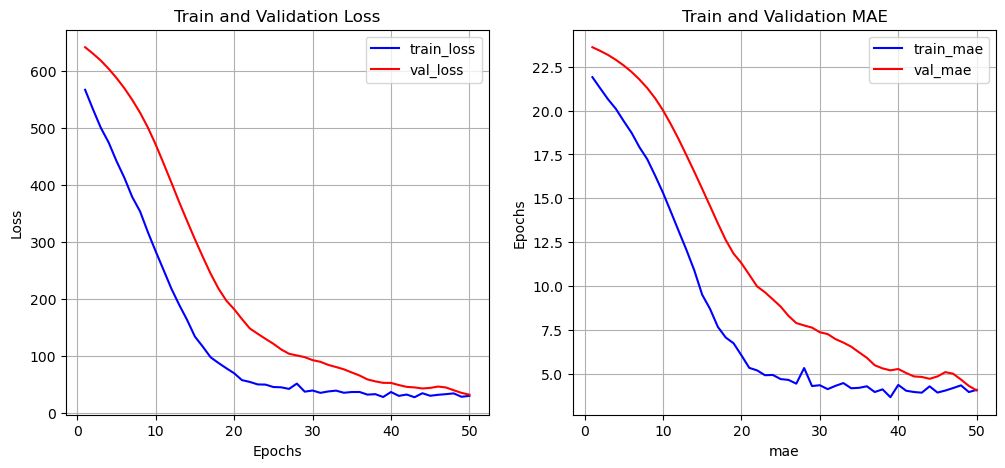

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('mae')
ax2.set_ylabel('Epochs')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
#이발루트
model.evaluate(train_data, train_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.0691 - mae: 3.5910 


[28.612794876098633, 3.6635282039642334]